In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
name='rl_ttl_strategy_'
directory= 'results/rl_ttl_strategy/cache_capacity_5000/2019_05_12_22_57'
caching_strategy_dir = f'{directory}/ttl_strategy'

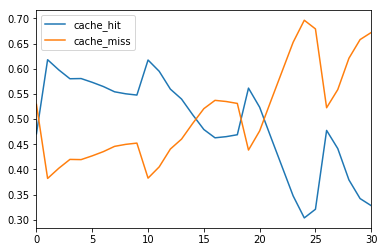

In [5]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', names=['timestamp', 'key', 'cache_hit', 'cache_miss'], 
                       usecols=['cache_hit', 'cache_miss']
                       )
stats_df[['cache_hit','cache_miss']] = stats_df[['cache_hit', 'cache_miss']].astype(int)
stats_df.groupby((stats_df.index // 10000)).mean().plot()

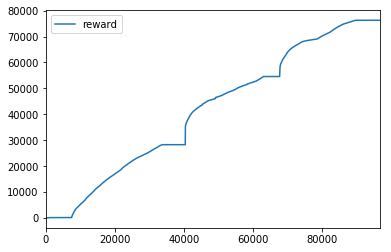

In [6]:
# Useful to compare various RL architecture 
# episode_reward_df = pd.read_csv(f'{eviction_strategy_dir}/{name}reward_logger.log', names=['reward'], parse_dates=True)
# ax = episode_reward_df.resample('5T').sum().plot(title='Sum of reward achieved')
# ax.set_xlabel("Time")
# ax.set_ylabel("Reward")
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}reward_logger.log', names=['timestamp', 'reward'], usecols=['reward'])
episode_reward_df.cumsum().plot()


Text(0.5, 0, 'Steps')

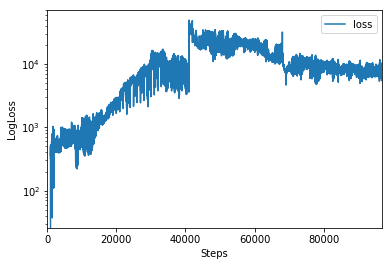

In [7]:

# losses_df = pd.read_csv(f'{eviction_strategy_dir}/{name}loss_logger.log', names=['loss'], parse_dates=True)
# 
# ax = losses_df.resample('5T').sum().plot(logy=True)
# ax.set_ylabel("Loss")
# ax.set_xlabel("Time")

losses_df = pd.read_csv(f'{caching_strategy_dir}/{name}loss_logger.log', names=['timestamp','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")


cache_hit     309750
cache_miss    309750
dtype: int64

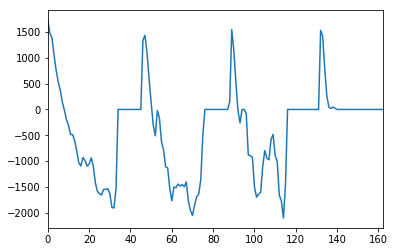

In [9]:
observations_df = pd.read_csv(f'{caching_strategy_dir}/{name}ttl_logger.log', names=['timestamp','observation', 'key', 'ttl', 'real_ttl', 'hits'], usecols=['ttl', 'real_ttl'])
diff = observations_df['ttl'] - observations_df['real_ttl']
diff.groupby((diff.index // 1000)).mean().plot()